# This is a tutorial to run a simulation of a simple Boolean Network model


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import booleanNetwork module from ./src
import sys
sys.path.append('./src/')
import booleanNetwork as bn

### Create a Simple Boolean network models

In [2]:
# Simple Boolean network model
# v0 = v0 | v1
# v1 = v0 | v1
# v2 = ( v0 | v1 ) & !v2

ngenes = 3

# conectivity matrix
varF = np.array( [[0, 1, -1],  # indices of genes connected to gene 0
                  [0, 1, -1],  # indices of genes connected to gene 1
                  [0, 1, 2]] ) # indices of genes connected to gene 2

# truth tables
F = np.array( [[0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 0 
               [0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 1
               [0, 0, 1, 0, 1, 0, 1, 0]] ) # truth table for gene 2
        

# initial state
x0  =  np.array( [1, 0, 1] )  # initial state [v0, v1, v2] 


### Run a small simulation of 3 steps without noise

In [3]:
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [5]:
y = network.update( 3 )  # run 3 steps of the Boolean network model
y 

array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1]], dtype=int8)

###  Run a simulation of 100000 steps with noise and plot state distribution from the trajectory

In [10]:
x0 = np.array( [0, 0, 0] ) # initial state
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [11]:
##%%timeit
noise_level = 0.01 # noise
y = network.update_noise ( noise_level  , 100000) # simulation with noise

1.76 s ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# transform boolean to decimal
p = np.array(  [2**i for i in range(ngenes-1, -1, -1) ] )  
states = y @ p.T 

<BarContainer object of 8 artists>

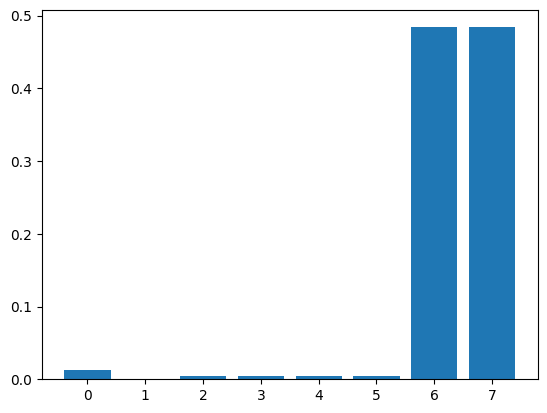

In [9]:
# plot state distribution
counts, bins = np.histogram( states, bins = range(2**ngenes + 1 )  )
freq = counts / np.sum( counts)
plt.bar(range(2**ngenes), freq )